*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA4703-1 Control Óptimo: Teoría y Laboratorio**  
**Profesor:** Héctor Ramírez  
**Auxiliares:** Javier Madariaga y Pablo Araya

**Nro. de grupo:** 20  
**Integrantes:** Tomás Banduc, Felipe Urrutia

# Laboratorio 2: 
## Controlabilidad, observabilidad, estabilidad y detectabilidad

El objetivo del presente laboratorio es estudiar la controlabilidad, observabilidad, estabilidad
y detectabilidad de un sistema lineal controlado. Para esto, se pide verificar los respectivos criterios de
manera directa y usando el paquete $\texttt{control}$ de Python. También se estudian conceptos relacionados
como la matriz Gramiana y la forma canónica de Brunovski.

In [170]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import control

<h2><center>Parte A</center></h2>

## Ejercicio 1

Un barco carguero debe llevar su cargamento hasta el puerto de Guangzhou, ubicado en el sur de China, atravesando el Océano Pacífico.

El movimiento descrito por dicho barco se basa de las siguientes suposiciones:

- El par $(x(t), y(t))$ es el vector $(abscisa, ordenada)$ que indica la posición del barco en el océano en un tiempo $t$.
- El barco se mueve con rapidez constante igual a V.
- El mar posee corrientes marinas que dependen solo de la posición $(x(t), y(t))$ del barco, y que influyen en su movimiento actuando como una fuerza externa, denotada por $\vec{G}(x, y) = (G1(x, y), G2(x, y))^T$.
- La masa del barco disminuye a medida que este consume combustible. Por simplicidad, se supone que esta disminución de masa es conocida, y depende solo del tiempo $t$, obteniendo así una función denotada $m(t)$.
- Los efectos del roce o viscosidad son despreciables.
- La posición del puerto Guangzhou se encuentra en el origen.

Dadas las suposiciones anteriores y, en virtud de la Segunda Ley de Newton, se tiene que el movimiento del barco satisface al relación:

$$ \begin{pmatrix}
G_1(x(t),y(t))\\
G_2(x(t),y(t)) 
\end{pmatrix} 
=
\dfrac{d (m(t)\vec{V}(t))}{dt}
=
\dot{m}(t)\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t)
\end{pmatrix}
+m(t)
\begin{pmatrix} \ddot{x}(t) \\
\ddot{y}(t) 
\end{pmatrix}$$

Despejando, esto equivale a $
\begin{pmatrix}
\ddot{x}(t) \\
\ddot{y}(t) 
\end{pmatrix}
=  
\dfrac{1}{m(t)}
\begin{pmatrix}
G_1(x(t),y(t)) \\
G_2(x(t),y(t))
\end{pmatrix}
-
\dfrac{\dot{m}(t)}{m(t)}
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t) 
\end{pmatrix}$.

Además, $
\vec{V}(t)
=
\begin{pmatrix}
\dot{x}(t) \\
\dot{y}(t) 
\end{pmatrix}$. 

Luego, el sistema que describe la trayectoria de la nave viene dado por:

$$\begin{align*}
\dot{
\begin{pmatrix}
x(t) \\ 
\dot{x}(t) \\ 
y(t) \\ 
\dot{y}(t) 
\end{pmatrix}
}
&= 
\begin{pmatrix}
\dot{x}(t) \\ 
-\frac{\dot{m}(t)}{m(t)}\dot{x}(t) \\
\dot{y}(t)\\ 
-\frac{\dot{m}(t)}{m(t)}\dot{y}(t)
\end{pmatrix}
+
\begin{pmatrix}
0 \\ 
\frac{G_1(x(t),y(t))}{m(t)} \\
0\\ 
\frac{G_1(x(t),y(t))}{m(t)}
\end{pmatrix}\\
&=
\begin{pmatrix}
0 & 1 & 0 & 0 \\ 
0 & -\frac{\dot{m}(t)}{m(t)} & 0 & 0 \\
0 & 0 & 0 & 1\\ 
0 & 0 & 0 & -\frac{\dot{m}(t)}{m(t)}\dot{y}(t)
\end{pmatrix}
\begin{pmatrix}
x(t) \\ 
\dot{x}(t) \\
y(t) \\ 
\dot{y}(t)
\end{pmatrix}
+
\begin{pmatrix}
0 \\ 
\frac{G_1(x(t),y(t))}{m(t)} \\
0\\ 
\frac{G_1(x(t),y(t))}{m(t)}
\end{pmatrix}
\end{align*}
$$ 

Tomando $
\vec{X}(t)
:=
\begin{pmatrix}
x_1(t) \\
x_2(t) \\
x_3(t) \\
x_4(t) \\
\end{pmatrix}
:=
\begin{pmatrix}
x(t) \\
\dot{x}(t) \\
y(t) \\
\dot{y}(t) \\
\end{pmatrix}$, 
$
A(t)
:=
\begin{pmatrix}
0 & 1 & 0 & 0 \\ 
0 & -\frac{\dot{m}(t)}{m(t)} & 0 & 0 \\
0 & 0 & 0 & 1\\ 
0 & 0 & 0 & -\frac{\dot{m}(t)}{m(t)}\dot{y}(t)
\end{pmatrix}$ y
$
\tilde{G}(\vec{X}(t))
:=
\begin{pmatrix}
0 \\ 
\frac{G_1(x_1(t),x_3(t))}{m(t)} \\
0\\ 
\frac{G_1(x_1(t),x_3(t))}{m(t)}
\end{pmatrix}
$,

se obtiene un sistema no-lineal y no-autónomo:

$$ \dot{\vec{X}}(t)=A(t)\vec{X}(t)+\tilde{G}(\vec{X}(t))$$

## Ejercicio 2

Supongamos ahora que las corrientes marinas vienen dadas por una función $\vec{G}$ lineal.
En este caso, estas corrientes vienen representadas por el siguiente sistema lineal de EDO:

$$(S)
\left\{
\begin{array}
[c]{cl}
\dot{x}(t)=ax(t)+by(t) \\
\dot{y}(t)=cx(t)+dy(t)
\end{array}
\right.
$$ 

, donde $a,b,c,d$ son constantes. A continuación, se muestran los diagramas de fase para las soluciones de $(S)$ según distintas asignaciones de parámetros, que se obtienen utilizando la applet $\texttt{pyplane}$.

In [3]:
# import run_pyplane

<img src="figures/e2_fig1.png" />

**Figura 1**: Diagrama de fase para $(S)$, con $a=b=c=d=1$.

<img src="figures/e2_fig2.png" />

**Figura 2**: Diagrama de fase para $(S)$, con $a=b=d=1, c=-1$.

<img src="figures/e2_fig3.png" />

**Figura 3**: Diagrama de fase para $(S)$, con $a=1,d=2,b=c=-1$.

<img src="figures/e2_fig4.png" />

**Figura 4**: Diagrama de fase para $(S)$, con $a=d=1,b=-1,c=10$.

<img src="figures/e2_fig5.png" />

**Figura 5**: Diagrama de fase para $(S)$, con $a=0, b=d=1, c=10$.

Derivando con respecto al tiempo, se deduce de $(S)$ la relación $$
\dot{\vec{X}}(t)=
\begin{pmatrix}
\dot{x}(t) \\
\ddot{x}(t) \\
\dot{y}(t) \\
\ddot{y}(t)\\
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 & 0 & 0 \\ 
0 & a & 0 & b\\ 
0 & 0 & 0 & 1\\ 
0 & c & 0 & d
\end{pmatrix}\vec{X}(t)=\tilde{A}\vec{X}(t)$$

Para maniobrar el barco se introduce un motor que produce cambios de aceleración horizontales
y verticales, dados por $u$ y $v$, respectivamente. 

Haciendo uso del modelo de la parte anterior, e intorduciendo la acelaración dada por $(u(t),v(t))$, queda la dinámica:

$$
\dot{\vec{X}}(t)
=
\begin{pmatrix}
0 & 1 & 0 & 0 \\ 
0 & a & 0 & b\\ 
0 & 0 & 0 & 1\\ 
0 & c & 0 & d
\end{pmatrix}
\vec{X}(t)
+
\begin{pmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 0 \\ 0 & 1\end{pmatrix}
\begin{pmatrix} u(t) \\ v(t) \end{pmatrix}
=\tilde{A}\vec{X}(t)+B\vec{U}(t)
$$

<h2><center>Parte B</center></h2>

En la presente sección, se supone que no hay cambios en la masa, es decir, $m(t) = m > 0$ para todo
$t \geq 0$. Además, consideramos las siguientes configuraciones de parámetros:

- $a = −1, b = −2, c = 4, d = −5$
- $y a = −1, b = 0, c = 4, d = −1$

## Ejercicio 3

En los siguientes bloques de código, se simulan y grafican las trayectorias del sistema para diferentes controles (constante, sinusoidal, feedback y bang-bang) y distintas condiciones iniciales, haciendo uso de $\texttt{solve_ivp}$.

Graficas la solucion y el control

In [10]:
# Definimos el sistema asociado al problema de control optimo

def control_system(t, x, A, B, u):
    dx = A @ x + B @ u(x, t)
    return dx

In [59]:
# Control constante

def u1(x, t): 
    
    return np.array([-2, 1])

# Control sinusoidal

def u2(x, t): 
    
    return np.array([np.sin(2*t), np.cos(t)])

# Control bang-bang

def u3(x, t): 
    
    if t < 1:
        return np.array([-1, -1])
    elif 1<= t < 2:
        return np.array([1, -1])
    elif 2 <= t < 5:
        return np.array([-1, 1])
    elif 5 <= t < 7:
        return np.array([-1, 1])
    elif 7 <= t < 10:
        return np.array([1, 1])
    else:
        return np.array([1, -1])

# Control feedback

def u4(x, t): 
    
    Z = np.array([[0, 1, -1, 1],
                  [1, -1, 1, 0],])
    return Z @ x

In [78]:
# Definimos los datos del problema

def datos(a, b, c, d):
    
    A = np.array([[0, 1, 0, 0], 
                  [0, a, 0, b],
                  [0, 0, 0, 1],
                  [0, c, 0, d]])
    
    B = np.array([[0, 0],
                  [1, 0],
                  [0, 0],
                  [0, 1]])
    
    return A, B

# Matrices a utilizar

A1, B1 = datos(a=-1, b=-2, c=4, d=-5)
A2, B2 = datos(a=-1, b=0, c=4, d=-1)

In [89]:
#def plot_sol(A, B, u):
#    icv = np.array([0, 0, 1, 1])
#    t_span = (0.0, 10.0)
#    t = np.arange(t_span[0], t_span[1], 0.01)
#    sol_ivp1 = solve_ivp(control_system, t_span, icv, args=[A, B, u], dense_output=True)
#    z1 = sol_ivp1.sol(t)
#    plt.plot(z1[0], z1[2])
#    plt.scatter([icv[0]], [icv[2]], color="red");
#    return sol_ivp1

In [90]:
def solve_u(A, B, u, x_0=np.array([0,0,1,1]),t_span=(0.0,10.0)):
    
    sol_ivp = solve_ivp(control_system, t_span, x_0, args=[A, B, u], dense_output=True)
    
    return sol_ivp

In [146]:
X_0 = [np.array([0,0,0,10]),np.array([0,1,0,1]),np.array([0,10,0,-5])]
t_span=(0,10)
plt.style.use("seaborn")

In [147]:
def plot_ej_3(A, B, u, X_0, t_span, title):
    
    SOL_IVP = [solve_u(A, B, u, x_0, t_span) for x_0 in X_0]
    T = np.arange(t_span[0], t_span[1], 0.01)
    
    fig, ax = plt.subplots(1,1, figsize=(15,6),sharey=True, sharex=True) 
    
    ax.set_title(title)
    ax.set_xlabel(r'$x$')  
    ax.set_ylabel(r'$y$')
    ax.grid(zorder=-1)
    
    for i in range(3):
        x_0=X_0[i]
        X_, Y_ = SOL_IVP[i].sol(T)[0], SOL_IVP[i].sol(T)[2]
        ax.plot(X_,Y_, label=r'$(x(t),y(t)); u=u_1; X_0='+str((x_0[0],x_0[1],x_0[2],x_0[3]))+'$', linewidth=1.5)
        ax.scatter([x_0[0]],[x_0[2]],zorder=2,color='black',marker='*')
    
    ax.legend()
    return SOL_IVP

CPU times: total: 46.9 ms
Wall time: 56 ms


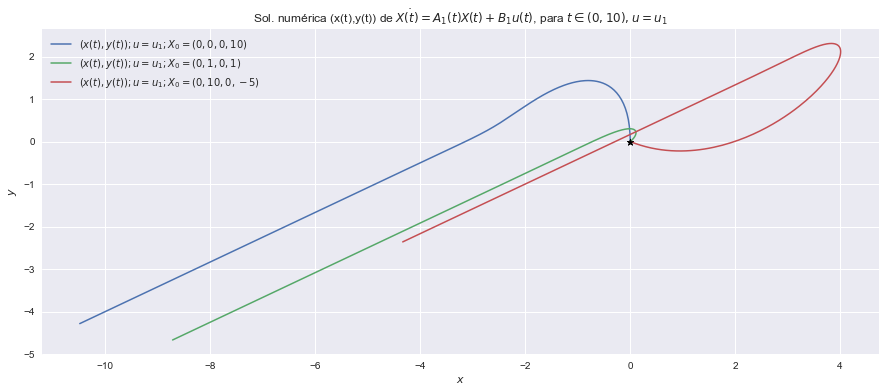

In [159]:
%%time
# constante
SOL_IVP_1_U1=plot_ej_3(A1, B1, u1, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_1(t)X(t)+B_1u(t)$, para $t\in' +str(t_span)+', u =u_1$')

CPU times: total: 46.9 ms
Wall time: 58 ms


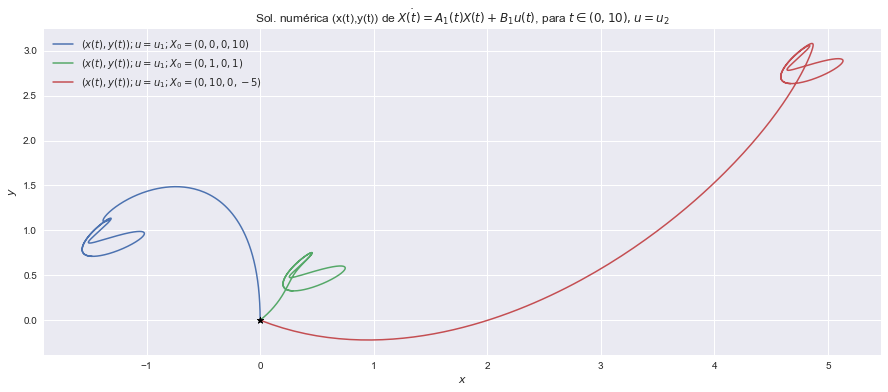

In [160]:
%%time 
# sinusoidales
SOL_IVP_1_U2=plot_ej_3(A1, B1, u2, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_1(t)X(t)+B_1u(t)$, para $t\in' +str(t_span)+', u=u_2$')

CPU times: total: 62.5 ms
Wall time: 60 ms


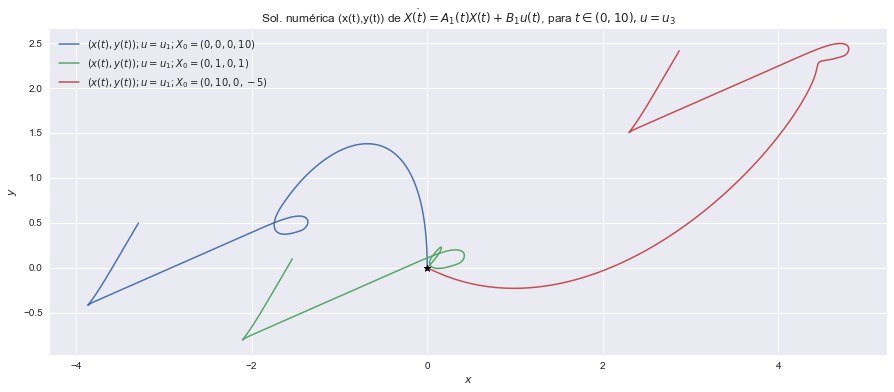

In [161]:
%%time 
# bang-bang
SOL_IVP_1_U3=plot_ej_3(A1, B1, u3, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_1(t)X(t)+B_1u(t)$, para $t\in' +str(t_span)+', u=u_3$')

CPU times: total: 62.5 ms
Wall time: 51 ms


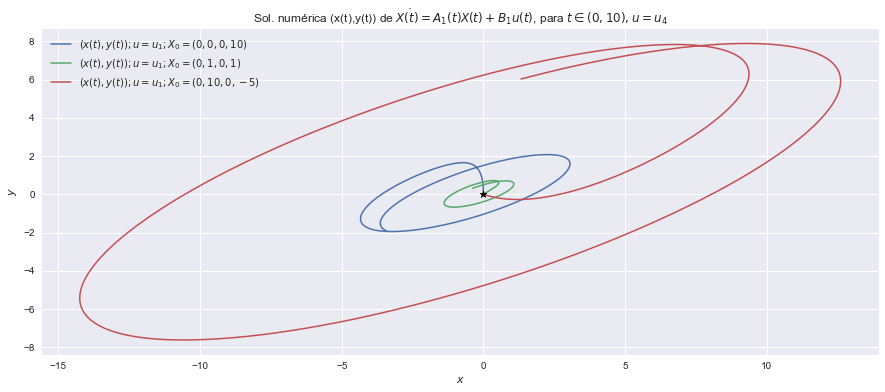

In [162]:
%%time 
# feedback
SOL_IVP_1_U4=plot_ej_3(A1, B1, u4, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_1(t)X(t)+B_1u(t)$, para $t\in' +str(t_span)+', u=u_4$')

CPU times: total: 46.9 ms
Wall time: 41 ms


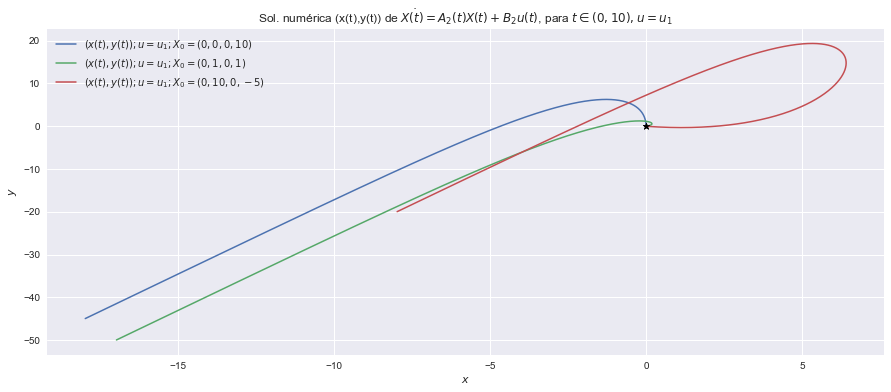

In [164]:
%%time
# constante
SOL_IVP_2_U1=plot_ej_3(A2, B2, u1, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_2(t)X(t)+B_2u(t)$, para $t\in' +str(t_span)+', u =u_1$')

CPU times: total: 46.9 ms
Wall time: 57 ms


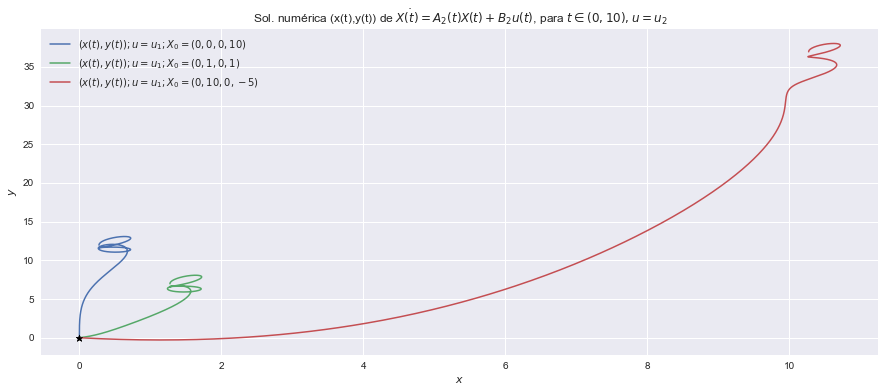

In [168]:
%%time
# sinusoidal
SOL_IVP_2_U2=plot_ej_3(A2, B2, u2, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_2(t)X(t)+B_2u(t)$, para $t\in' +str(t_span)+', u =u_2$')

CPU times: total: 46.9 ms
Wall time: 50 ms


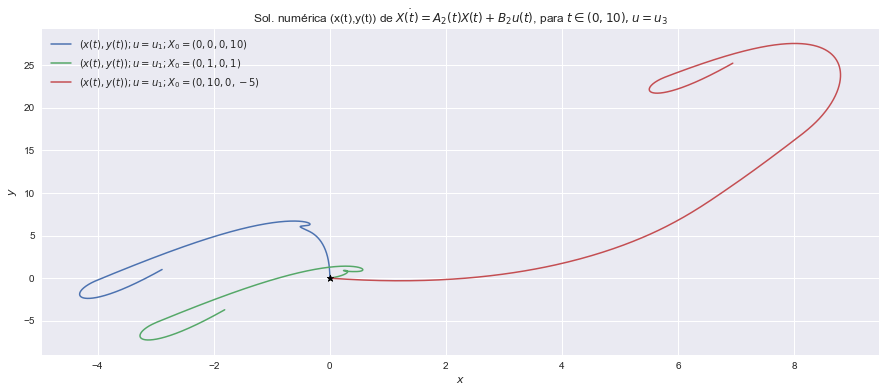

In [167]:
%%time
# bang-bang
SOL_IVP_2_U3=plot_ej_3(A2, B2, u3, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_2(t)X(t)+B_2u(t)$, para $t\in' +str(t_span)+', u =u_3$')

CPU times: total: 46.9 ms
Wall time: 45 ms


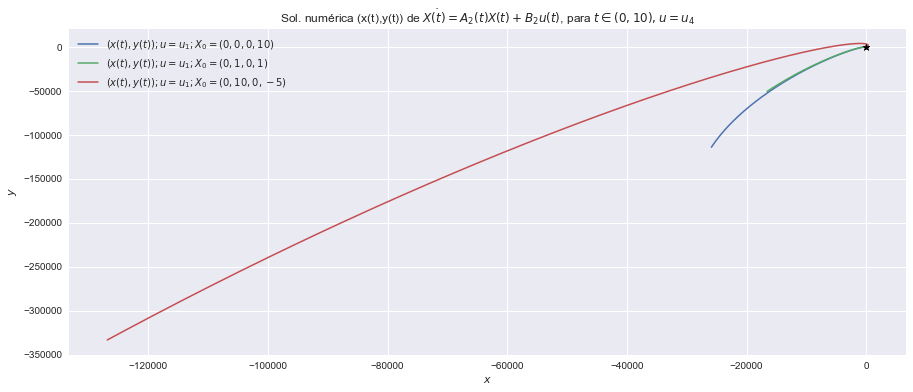

In [169]:
%%time
# feedback
SOL_IVP_2_U4=plot_ej_3(A2, B2, u4, X_0, t_span, r'Sol. numérica (x(t),y(t)) de $\dot{X(t)}=A_2(t)X(t)+B_2u(t)$, para $t\in' +str(t_span)+', u =u_4$')

# COMENTAR GRÁFICOS

## Ejercicio 4

En el código siguiente, utilizando herramientas de $\texttt{python}$, se calcula la matriz de controlabilidad

$$C = [B, AB, A^2B, \dots , A^{n−1}B],$$

 con $A\in \mathbb{R}^{n\times n}, B\in\mathbb{R}^{n\times p}$ , para los distintos valores de $a$, $b$, $c$ y $d$ dados. Luego, se compara con la matriz obtenida mediante $\texttt{ctrb}$ de $\texttt{control}$. 

In [171]:
def kalman(A, B):
    
    n, m = B.shape

    C = np.zeros([n,n*m])

    C[:,:m]=B

    for i in range(m,n*m,m):
        C[:,i:i+m]=A@C[:,i-m:i]
        
    return C

In [185]:
%%time
print("C para a=-1, b=-2, c=4, d=-5")
C1 = kalman(A1, B1)
C1

C para a=-1, b=-2, c=4, d=-5
CPU times: total: 0 ns
Wall time: 999 µs


array([[  0.,   0.,   1.,   0.,  -1.,  -2.,  -7.,  12.],
       [  1.,   0.,  -1.,  -2.,  -7.,  12.,  55., -46.],
       [  0.,   0.,   0.,   1.,   4.,  -5., -24.,  17.],
       [  0.,   1.,   4.,  -5., -24.,  17.,  92., -37.]])

In [184]:
%%time
print("C para a=-1, b=-2, c=4, d=-5 (ctrb)")
C1_ctrb = control.ctrb(A1, B1)
C1_ctrb

C para a=-1, b=-2, c=4, d=-5 (ctrb)
CPU times: total: 0 ns
Wall time: 1 ms


array([[  0.,   0.,   1.,   0.,  -1.,  -2.,  -7.,  12.],
       [  1.,   0.,  -1.,  -2.,  -7.,  12.,  55., -46.],
       [  0.,   0.,   0.,   1.,   4.,  -5., -24.,  17.],
       [  0.,   1.,   4.,  -5., -24.,  17.,  92., -37.]])

In [181]:
print("Matrices coinciden: ",np.all(C1 == C1_ctrb))
print("Rango de C:",np.linalg.matrix_rank(C1) )

Matrices coinciden:  True
Rango de C: 4


Para la primera elección de $a,b,c,d$, se verifica que la matriz calculada mediante ambos métodos es la misma. Por otro lado, dado que el conjunto de vectores columna $
\left\{
\begin{pmatrix}
0\\
1\\
0\\
0
\end{pmatrix}
,
\begin{pmatrix}
0\\
0\\
0\\
1\\
\end{pmatrix}
,
\begin{pmatrix}
1\\
-1\\
0\\
4
\end{pmatrix}
,
\begin{pmatrix}
0\\
-2\\
1\\
5
\end{pmatrix}
\right\}$
 es l.i., entonces $C$ es de rango completo ($rango(C)=4$), y, por ende, el sistema $(A_1,B_1)$ es controlable.

In [186]:
%%time
print("C para a=-1, b=0, c=4, d=-1")
C2 = kalman(A2, B2)
C2

C para a=-1, b=0, c=4, d=-1
CPU times: total: 0 ns
Wall time: 1 ms


array([[ 0.,  0.,  1.,  0., -1.,  0.,  1.,  0.],
       [ 1.,  0., -1.,  0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.,  4., -1., -8.,  1.],
       [ 0.,  1.,  4., -1., -8.,  1., 12., -1.]])

In [189]:
%%time
print("C para a=-1, b=0, c=4, d=-1 (ctrb)")
C2_ctrb = control.ctrb(A2, B2)
C2_ctrb

C para a=-1, b=0, c=4, d=-1 (ctrb)
CPU times: total: 0 ns
Wall time: 0 ns


array([[ 0.,  0.,  1.,  0., -1.,  0.,  1.,  0.],
       [ 1.,  0., -1.,  0.,  1.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.,  4., -1., -8.,  1.],
       [ 0.,  1.,  4., -1., -8.,  1., 12., -1.]])

In [190]:
print("Matrices coinciden: ",np.all(C2 == C2_ctrb))
print("Rango de C:",np.linalg.matrix_rank(C2) )

Matrices coinciden:  True
Rango de C: 4


Para la segunda selección de $a,b,c,d$, nuevamente la matriz calculada mediante ambos métodos es la misma. Además, dado que el conjunto de vectores columna $
\left\{
\begin{pmatrix}
0\\
1\\
0\\
0
\end{pmatrix}
,
\begin{pmatrix}
0\\
0\\
0\\
1\\
\end{pmatrix}
,
\begin{pmatrix}
1\\
-1\\
0\\
4
\end{pmatrix}
,
\begin{pmatrix}
0\\
0\\
1\\
-1
\end{pmatrix}
\right\}$ es l.i., entonces $C$ es de rango completo, y, en consecuencia, el sistema $(A_2,B_2)$ es controlable.

## Ejercicio 5

A continuación, suponemos que se observa la dinámica del sistema a través del modelo $\vec{Y}=C\vec{X}$, donde $C=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0
\end{pmatrix}$.

El sistema resultante es de la forma
$$\begin{align*}
\dot{\vec{X}}(t)&=A\vec{X}(t)+B\vec{U}(t)\\
\dot{\vec{Y}}(t)&=C\vec{X}(t)
\end{align*}
$$
Utilizando $\texttt{python}$, se calcula la matriz de observabilidad:

$$\mathcal{O}=[C;CA;C^2A;\dots;C^{n-1}A],$$

In [191]:
C = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

In [192]:
def obsv(A, C):
    
    q, n = C.shape

    O = np.zeros([n*q, n])

    O[:q,:]=C

    for i in range(q,n*q,q):
        O[i:i+q,:]=O[i-q:i,:]@A
    return O

In [193]:
%%time
print("O para a=-1, b=-2, c=4, d=-5")
O1 = obsv(A1, C)
O1

O para a=-1, b=-2, c=4, d=-5
CPU times: total: 0 ns
Wall time: 0 ns


array([[  1.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.],
       [  0.,  -1.,   0.,  -2.],
       [  0.,   4.,   0.,  -5.],
       [  0.,  -7.,   0.,  12.],
       [  0., -24.,   0.,  17.]])

In [196]:
%%time
print("C para a=-1, b=-2, c=4, d=-5 (obsv)")
O1_obsv = control.obsv(A1, C)
O1_obsv

C para a=-1, b=-2, c=4, d=-5 (obsv)
CPU times: total: 0 ns
Wall time: 1 ms


array([[  1.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.],
       [  0.,  -1.,   0.,  -2.],
       [  0.,   4.,   0.,  -5.],
       [  0.,  -7.,   0.,  12.],
       [  0., -24.,   0.,  17.]])

In [197]:
print("Matrices coinciden: ",np.all(O1 == O1_obsv))
print("Rango de O:",np.linalg.matrix_rank(O1))

Matrices coinciden:  True
Rango de O: 4


In [198]:
%%time
print("O para a=-1, b=0, c=4, d=-1")
O2 = obsv(A2, C)
O2

O para a=-1, b=0, c=4, d=-1
CPU times: total: 0 ns
Wall time: 1e+03 µs


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  4.,  0., -1.],
       [ 0.,  1.,  0.,  0.],
       [ 0., -8.,  0.,  1.]])

In [199]:
%%time
print("O para a=-1, b=0, c=4, d=-1 (obsv)")
O2_obsv = control.obsv(A2, C)
O2_obsv

O para a=-1, b=0, c=4, d=-1 (obsv)
CPU times: total: 0 ns
Wall time: 0 ns


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  4.,  0., -1.],
       [ 0.,  1.,  0.,  0.],
       [ 0., -8.,  0.,  1.]])

In [200]:
print("Matrices coinciden: ",np.all(O2 == O2_obsv))
print("Rango de O:",np.linalg.matrix_rank(O2) )

Matrices coinciden:  True
Rango de O: 4


Tanto para la primera como para la segunda elección de $a$, $b$, $c$ y $d$, se obtiene que la matriz de observabilidad calculada coincide para los dos métodos empleados. Además, ambas matrices poseen en su colección de vectores fila a la familia de vectores canónicos de $\mathbb{R}^4$ ($\{e_i\}_{i=1}^4$), por lo que son de rango completo. Así, $(A_1,B_1,C)$ y $(A_2,B_2,C)$ son sistemas observables.

## Ejercicio 6

En los siguientes bloques se definen los espacios de estado de los sistemas de observabilidad, y se ejecuta la función $\texttt{gram}$ sobre ellos para obtener su Gramiano.

In [201]:
#state space
ss1 = control.StateSpace(A1, B1, C, np.zeros((C.shape[0], B1.shape[1])))
ss1

StateSpace(array([[ 0.,  1.,  0.,  0.],
       [ 0., -1.,  0., -2.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  4.,  0., -5.]]), array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.]]), array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]]), array([[0., 0.],
       [0., 0.]]))

In [202]:
#state space
ss2 = control.StateSpace(A2, B2, C, np.zeros((C.shape[0], B2.shape[1])))
ss2

StateSpace(array([[ 0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  4.,  0., -1.]]), array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.]]), array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]]), array([[0., 0.],
       [0., 0.]]))

In [203]:
control.gram(ss1, "c")

ValueError: Oops, the system is unstable!

In [204]:
control.gram(ss2, "c")

ValueError: Oops, the system is unstable!

In [205]:
control.gram(ss1, "o")

ValueError: Oops, the system is unstable!

In [206]:
control.gram(ss2, "o")

ValueError: Oops, the system is unstable!

No es posible calcular los Gramianos del sistema, dado que 

# Parte C

## Ejercicio 7

In [225]:
K1 = control.place(A1, B1, -np.array([1, 1/2, 1/3, 1/4]))
print("K:", K1)
print("eigvalues: A-BK", np.linalg.eig(A1-B1@K1)[0])

K: [[-0.72300847  1.17557587 -2.09253855 -0.25910822]
 [ 3.90746044 -0.25911092 -4.8186582   0.90775747]]
eigvalues: A-BK [-1.         -0.5        -0.33333333 -0.25      ]


In [224]:
K2 = control.place(A2, B2, -np.array([1, 1/2, 1/3, 1/4]))
print("K:", K2)
print("eigvalues: A-BK", np.linalg.eig(A2-B2@K2)[0])

K: [[-0.72300847  1.17557587 -0.09253855 -0.25910822]
 [ 3.90746044 -0.25911092 -0.8186582   0.90775747]]
eigvalues: A-BK [-1.         -0.5        -0.33333333 -0.25      ]


In [196]:
help(control.place)

Help on function place in module control.statefbk:

place(A, B, p)
    Place closed loop eigenvalues
    
    K = place(A, B, p)
    
    Parameters
    ----------
    A : 2D array_like
        Dynamics matrix
    B : 2D array_like
        Input matrix
    p : 1D array_like
        Desired eigenvalue locations
    
    Returns
    -------
    K : 2D array (or matrix)
        Gain such that A - B K has eigenvalues given in p
    
    Notes
    -----
    Algorithm
        This is a wrapper function for :func:`scipy.signal.place_poles`, which
        implements the Tits and Yang algorithm [1]_. It will handle SISO,
        MISO, and MIMO systems. If you want more control over the algorithm,
        use :func:`scipy.signal.place_poles` directly.
    
    Limitations
        The algorithm will not place poles at the same location more
        than rank(B) times.
    
    The return type for 2D arrays depends on the default class set for
    state space operations.  See :func:`~control.use_n

In [228]:
K_1 = control.lqr(A1, B1, np.eye(4), np.eye(2))
print("K:", K_1[0])
print("eigvalues: A-BK", np.linalg.eig(A1-B1@K_1[0])[0])

K: [[ 2.24340784  2.28940021 -3.01027767 -0.49544159]
 [ 1.26498527 -0.49544159  0.38324614  1.23330042]]
eigvalues: A-BK [-0.84485072+2.15812617j -0.84485072-2.15812617j -0.91649959+1.37703873j
 -0.91649959-1.37703873j]


In [230]:
K_2 = control.lqr(A2, B2, np.eye(4), np.eye(2))
print("K:", K_2[0])
print("eigvalues: A-BK", np.linalg.eig(A2-B2@K_2[0])[0])

K: [[ 2.83751278  2.53944595 -0.40326128  0.47564675]
 [ 2.19071958  0.47564675  0.35550003  1.21850738]]
eigvalues: A-BK [-0.79983234+1.6061606j  -0.79983234-1.6061606j  -1.07914433+0.47384847j
 -1.07914433-0.47384847j]


In [243]:
K_1

(array([[ 2.24340784,  2.28940021, -3.01027767, -0.49544159],
        [ 1.26498527, -0.49544159,  0.38324614,  1.23330042]]),
 array([[ 8.78049864,  2.24340784, -4.98001394,  1.26498527],
        [ 2.24340784,  2.28940021, -3.01027767, -0.49544159],
        [-4.98001394, -3.01027767,  7.13969328,  0.38324614],
        [ 1.26498527, -0.49544159,  0.38324614,  1.23330042]]),
 array([-0.84485072+2.15812617j, -0.84485072-2.15812617j,
        -0.91649959+1.37703873j, -0.91649959-1.37703873j]))

In [249]:
def U1_place(x, t):
    return - K1 @ x
def U2_place(x, t):
    return - K2 @ x
def U1_lqr(x, t):
    return - K_1[0] @ x
def U2_lqr(x, t):
    return - K_2[0] @ x

Wall time: 28.9 ms


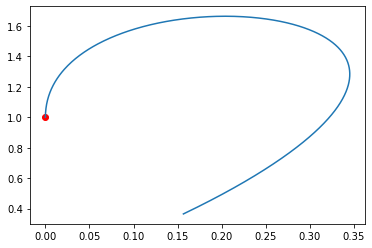

In [363]:
%%time
sol_ivp1place = plot_sol(A=A1, B=B1, u=U1_place)

Wall time: 32.9 ms


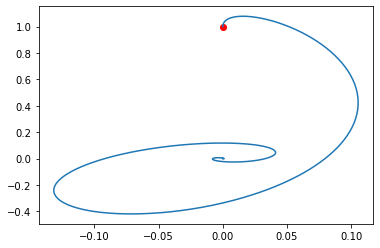

In [364]:
%%time
sol_ivp1lqr = plot_sol(A=A1, B=B1, u=U1_lqr)

Wall time: 36.9 ms


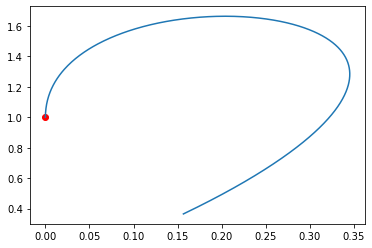

In [365]:
%%time
sol_ivp2place = plot_sol(A=A2, B=B2, u=U2_place)

Wall time: 137 ms


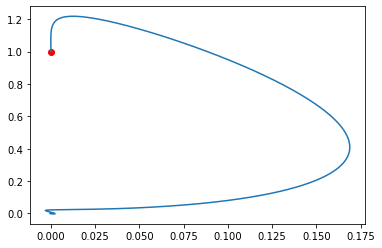

In [366]:
%%time
sol_ivp2lqr = plot_sol(A=A2, B=B2, u=U2_lqr)

## Ejercicio 8

$$
C = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 0&  1 & 0\end{bmatrix}
$$
$$
Y = \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 0&  1 & 0\end{bmatrix} \begin{bmatrix} x \\ dx \\y  \\ dy\end{bmatrix} = C X
$$

In [373]:
L1place = control.place(A1.T, C.T, -np.array([1, 1/2, 1/3, 1/4]))
L1place = L1place.T
L1place

array([[ 1.17557587, -0.25911092],
       [-0.72300847, -2.09253956],
       [-0.25910822,  0.90775747],
       [ 3.90746145, -4.8186582 ]])

In [387]:
L2place = control.place(A2.T, C.T, -np.array([1, 1/2, 1/3, 1/4]))
L2place = L2place.T
L2place

array([[ 1.17557587, -0.25911092],
       [-0.72300847, -0.09253956],
       [-0.25910822,  0.90775747],
       [ 3.90746145, -0.8186582 ]])

In [377]:
L1lqr = control.lqr(A1.T, C.T, np.eye(4), np.eye(2))
L1lqr = L1lqr[0].T
L1lqr

array([[ 1.68182698,  0.71970487],
       [ 1.17325854, -0.86997907],
       [ 0.71970487,  1.84087365],
       [ 3.40528387,  1.45339544]])

In [388]:
L2lqr = control.lqr(A2.T, C.T, np.eye(4), np.eye(2))
L2lqr = L2lqr[0].T
L2lqr

array([[ 1.21850738,  0.47564675],
       [ 0.35550003, -0.40326128],
       [ 0.47564675,  2.53944595],
       [ 2.19071958,  2.83751278]])

In [369]:
def estimador(t, x, u, x_, A, B, C, L):
    dx = A @ x + B @ u(x, t) + L @ ( C @ x_.sol(t) - C @ x )
    return dx

In [370]:
estimador(t=0.1, x=np.ones(4), u=u1, x_=sol_ivp11, A=A1, B=B1, C=C, L=L1)

array([-0.20585572, -2.2266767 ,  1.32935995, -5.20388627])

In [390]:
def plot_estimador(u, x_, A, B, C, L):
    icv = np.array([10, 0, 1, 1]) # condicion incial del estimador
    t_span = (0.0, 10.0)
    t = np.arange(t_span[0], t_span[1], 0.01)
    sol_ivp1 = solve_ivp(estimador, t_span, icv, args=[u, x_, A, B, C, L], dense_output=True)
    z1 = sol_ivp1.sol(t)
    z0 = x_.sol(t)
    plt.plot(z1[0], z1[2])
    plt.plot(z0[0], z0[2], color="orange")
    plt.scatter([icv[0]], [icv[2]], color="red");
    return sol_ivp1

Wall time: 46.9 ms


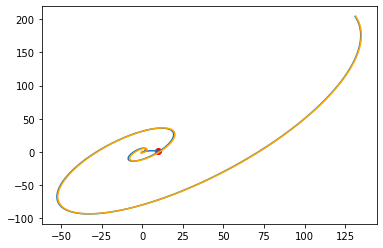

In [391]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u1, x_=sol_ivp11, C=C, L=L1place); # Constante

Wall time: 59.8 ms


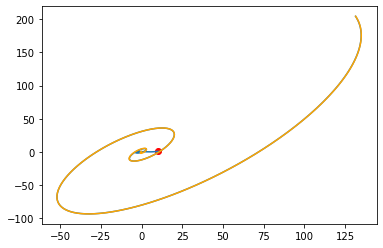

In [392]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u1, x_=sol_ivp11, C=C, L=L1lqr); # Constante

Wall time: 35.9 ms


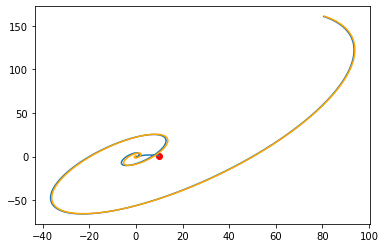

In [393]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u2, x_=sol_ivp12, C=C, L=L1place); # Sinusoidal

Wall time: 51.8 ms


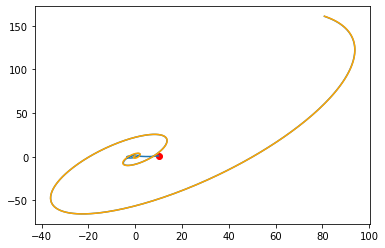

In [394]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u2, x_=sol_ivp12, C=C, L=L1lqr); # Sinusoidal

Wall time: 42.9 ms


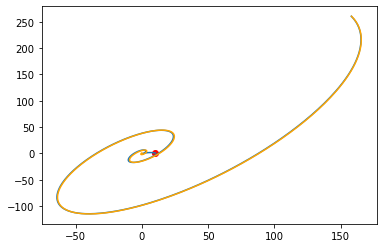

In [395]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u3, x_=sol_ivp13, C=C, L=L1place); # bang-bang

Wall time: 156 ms


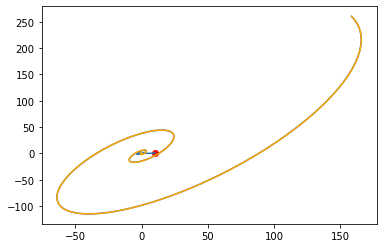

In [396]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u3, x_=sol_ivp13, C=C, L=L1lqr); # bang-bang

Wall time: 49.8 ms


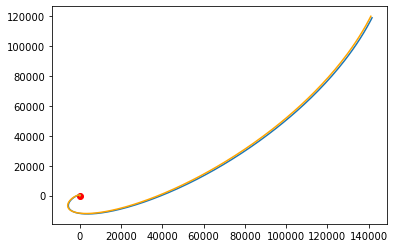

In [397]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u4, x_=sol_ivp14, C=C, L=L1place); # feedbacks

Wall time: 45.9 ms


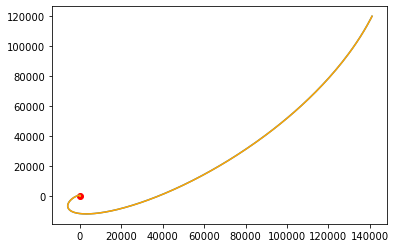

In [398]:
%%time
_ = plot_estimador(A=A1, B=B1, u=u4, x_=sol_ivp14, C=C, L=L1lqr); # feedbacks

Wall time: 47.9 ms


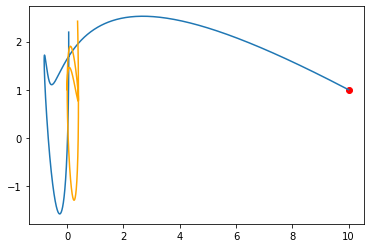

In [399]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u1, x_=sol_ivp21, C=C, L=L2place); # Constante

Wall time: 62.8 ms


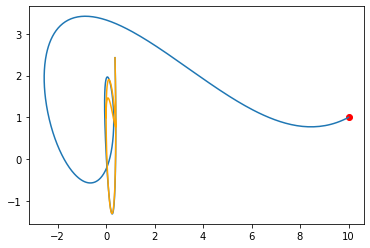

In [400]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u1, x_=sol_ivp21, C=C, L=L2lqr); # Constante

Wall time: 46.9 ms


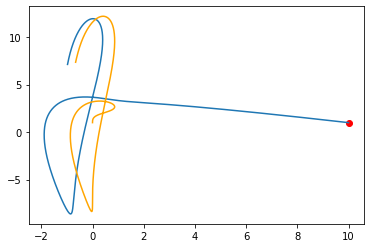

In [401]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u2, x_=sol_ivp22, C=C, L=L2place); # Sinusoidal

Wall time: 62.8 ms


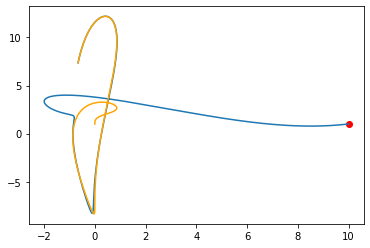

In [402]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u2, x_=sol_ivp22, C=C, L=L2lqr); # Sinusoidal

Wall time: 50.8 ms


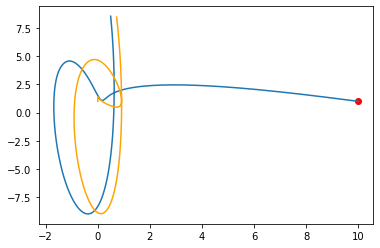

In [403]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u3, x_=sol_ivp23, C=C, L=L2place); # bang-bang

Wall time: 70.8 ms


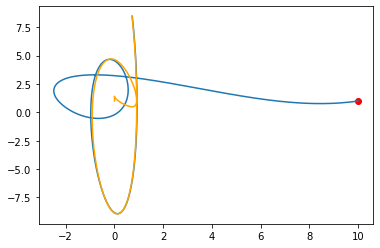

In [404]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u3, x_=sol_ivp23, C=C, L=L2lqr); # bang-bang

Wall time: 41.9 ms


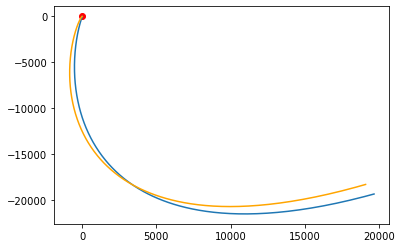

In [405]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u4, x_=sol_ivp24, C=C, L=L2place); # feedbacks

Wall time: 48.9 ms


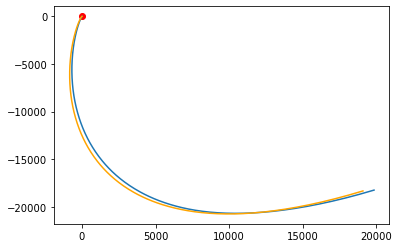

In [406]:
%%time
_ = plot_estimador(A=A2, B=B2, u=u4, x_=sol_ivp24, C=C, L=L2lqr); # feedbacks

## Ejercicio 9